In [ ]:
# https://youtu.be/TCH_1BHY58I
# https://github.com/karpathy/makemore 

In [6]:
# we now go to MLP (multilayer perceptron)....(using NLP (natural language processing))
# 'a neural probabilistic language model' (2003) chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf
# embedding of words and transfer knowledge....comment in class....
# fig 1: 4th word predicted after the three....
import random
import torch
import torch.nn.functional as  F
import matplotlib.pyplot as plt #for making figures
%matplotlib inline

In [7]:
# read in all the words
random.seed(158)
words=open('Data/nomi_italiani.txt','r').read().splitlines()
random.shuffle(words)
words[0:10]

['argento',
 'giovannino',
 'licurga',
 'elvira',
 'marena',
 'sirio',
 'emilia',
 'bisio',
 'preziosa',
 'perpetua']

In [8]:
len(words)

9105

In [9]:
# build the vocabulary of characters and mapping to/from integers
chars=sorted(list(set(''.join(words))))

stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos ={i:s for s,i in stoi.items()}
print(itos)
print(stoi)

{1: '-', 2: 'a', 3: 'b', 4: 'c', 5: 'd', 6: 'e', 7: 'f', 8: 'g', 9: 'h', 10: 'i', 11: 'j', 12: 'k', 13: 'l', 14: 'm', 15: 'n', 16: 'o', 17: 'p', 18: 'q', 19: 'r', 20: 's', 21: 't', 22: 'u', 23: 'v', 24: 'w', 25: 'x', 26: 'y', 27: 'z', 0: '.'}
{'-': 1, 'a': 2, 'b': 3, 'c': 4, 'd': 5, 'e': 6, 'f': 7, 'g': 8, 'h': 9, 'i': 10, 'j': 11, 'k': 12, 'l': 13, 'm': 14, 'n': 15, 'o': 16, 'p': 17, 'q': 18, 'r': 19, 's': 20, 't': 21, 'u': 22, 'v': 23, 'w': 24, 'x': 25, 'y': 26, 'z': 27, '.': 0}


In [10]:
# build the dataset

block_size =3 #context length: how many characters do we take to predict the next one ... change it !!
# try: block_size=1 ...Markov Chain, then try = 2 and =10
X,Y = [],[]  # input & label

for w in words[0:5]:
    print(w)
    context=[0]*block_size
    for ch in w +'.':
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        context=context[1:]+[ix]  # shift: crop and append
X=torch.tensor(X)
Y=torch.tensor(Y)

argento
... ---> a
..a ---> r
.ar ---> g
arg ---> e
rge ---> n
gen ---> t
ent ---> o
nto ---> .
giovannino
... ---> g
..g ---> i
.gi ---> o
gio ---> v
iov ---> a
ova ---> n
van ---> n
ann ---> i
nni ---> n
nin ---> o
ino ---> .
licurga
... ---> l
..l ---> i
.li ---> c
lic ---> u
icu ---> r
cur ---> g
urg ---> a
rga ---> .
elvira
... ---> e
..e ---> l
.el ---> v
elv ---> i
lvi ---> r
vir ---> a
ira ---> .
marena
... ---> m
..m ---> a
.ma ---> r
mar ---> e
are ---> n
ren ---> a
ena ---> .


In [13]:
Y

tensor([ 2, 19,  8,  6, 15, 21, 16,  0,  8, 10, 16, 23,  2, 15, 15, 10, 15, 16,
         0, 13, 10,  4, 22, 19,  8,  2,  0,  6, 13, 23, 10, 19,  2,  0, 14,  2,
        19,  6, 15,  2,  0])

In [14]:
X.shape, X.dtype,Y.shape,Y.dtype

(torch.Size([41, 3]), torch.int64, torch.Size([41]), torch.int64)

In [15]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  2],
        [ 0,  2, 19],
        [ 2, 19,  8],
        [19,  8,  6],
        [ 8,  6, 15],
        [ 6, 15, 21],
        [15, 21, 16],
        [ 0,  0,  0],
        [ 0,  0,  8],
        [ 0,  8, 10],
        [ 8, 10, 16],
        [10, 16, 23],
        [16, 23,  2],
        [23,  2, 15],
        [ 2, 15, 15],
        [15, 15, 10],
        [15, 10, 15],
        [10, 15, 16],
        [ 0,  0,  0],
        [ 0,  0, 13],
        [ 0, 13, 10],
        [13, 10,  4],
        [10,  4, 22],
        [ 4, 22, 19],
        [22, 19,  8],
        [19,  8,  2],
        [ 0,  0,  0],
        [ 0,  0,  6],
        [ 0,  6, 13],
        [ 6, 13, 23],
        [13, 23, 10],
        [23, 10, 19],
        [10, 19,  2],
        [ 0,  0,  0],
        [ 0,  0, 14],
        [ 0, 14,  2],
        [14,  2, 19],
        [ 2, 19,  6],
        [19,  6, 15],
        [ 6, 15,  2]])

In [135]:
Y

tensor([ 2, 19,  8,  6, 15, 21, 16,  0,  8, 10, 16, 23,  2, 15, 15, 10, 15, 16,
         0, 13, 10,  4, 22, 19,  8,  2,  0,  6, 13, 23, 10, 19,  2,  0, 14,  2,
        19,  6, 15,  2,  0])

In [136]:
# we want a model that input X and predict Y ......
# first  the embedding in d= 2 of the 28 th character ( in the paper d=30 with a 17k vocabulary...)

In [16]:
C=torch.randn((28,2))  #https://pytorch.org/docs/stable/generated/torch.randn.html

In [17]:
C[5] # equivalent to one-hot encording....!! index= neuron input...first layer...comment in class

tensor([-1.0573, -0.8230])

In [18]:
C.shape

torch.Size([28, 2])

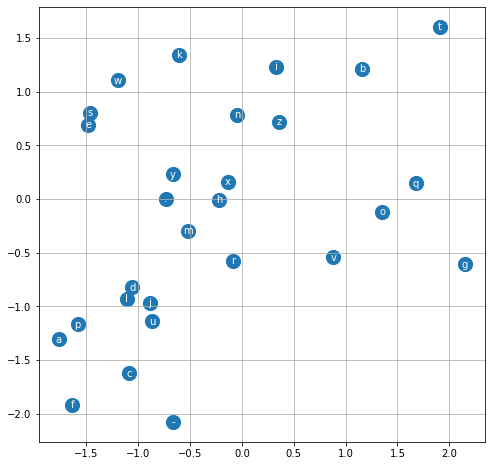

In [19]:
#visualizing the embedding.....

plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data,s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(),itos[i], ha="center",va="center", color="white")
    plt.grid('minor')
    
    


In [20]:
F.one_hot(torch.tensor(5),num_classes=28)  #comment this in class.....

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])

In [21]:
F.one_hot(torch.tensor(5),num_classes=28).float()@C   #comment this in class.....

tensor([-1.0573, -0.8230])

In [143]:
# i.e. the first (linear) layer (fig. in the paper).....

In [22]:
X.shape

torch.Size([41, 3])

In [23]:
# How we embed the 41 3-ngram's ??
emb=C[X] # the beauty of tensor....
emb.shape

torch.Size([41, 3, 2])

In [24]:
# moreover C is also "differentiable" !!

In [25]:
X[14]

tensor([23,  2, 15])

In [26]:
X[14,2]

tensor(15)

In [27]:
C[X]

tensor([[[-0.7329,  0.0035],
         [-0.7329,  0.0035],
         [-0.7329,  0.0035]],

        [[-0.7329,  0.0035],
         [-0.7329,  0.0035],
         [-1.7652, -1.3083]],

        [[-0.7329,  0.0035],
         [-1.7652, -1.3083],
         [-0.0843, -0.5756]],

        [[-1.7652, -1.3083],
         [-0.0843, -0.5756],
         [ 2.1483, -0.6080]],

        [[-0.0843, -0.5756],
         [ 2.1483, -0.6080],
         [-1.4823,  0.6944]],

        [[ 2.1483, -0.6080],
         [-1.4823,  0.6944],
         [-0.0478,  0.7857]],

        [[-1.4823,  0.6944],
         [-0.0478,  0.7857],
         [ 1.9068,  1.6073]],

        [[-0.0478,  0.7857],
         [ 1.9068,  1.6073],
         [ 1.3554, -0.1196]],

        [[-0.7329,  0.0035],
         [-0.7329,  0.0035],
         [-0.7329,  0.0035]],

        [[-0.7329,  0.0035],
         [-0.7329,  0.0035],
         [ 2.1483, -0.6080]],

        [[-0.7329,  0.0035],
         [ 2.1483, -0.6080],
         [ 0.3319,  1.2316]],

        [[ 2.1483, -0

In [28]:
C[X][14,:]

tensor([[ 0.8822, -0.5451],
        [-1.7652, -1.3083],
        [-0.0478,  0.7857]])

In [29]:
C[X][14,2]

tensor([-0.0478,  0.7857])

In [30]:
X[14]

tensor([23,  2, 15])

In [31]:
C[15,:]

tensor([-0.0478,  0.7857])

In [32]:
emb.shape

torch.Size([41, 3, 2])

In [33]:
# construct the Layer.... x.W+ b ... so the input has dimension 6=3*2 for (say) 100 neurons...
W1=torch.randn(6,100)
b1=torch.randn(100)


In [34]:
# 'roughly' we want to compute emb @ W1 + b1....we need to 'concatenate'....discuss in class..
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (123x2 and 6x100)

In [35]:
# https://pytorch.org/docs/stable/torch.html search for concatenate...
# we want emb[:,0,:],emb[:,1,:],emb[:,2,:]  show in class.....

torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1)
#torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1).shape


tensor([[-0.7329,  0.0035, -0.7329,  0.0035, -0.7329,  0.0035],
        [-0.7329,  0.0035, -0.7329,  0.0035, -1.7652, -1.3083],
        [-0.7329,  0.0035, -1.7652, -1.3083, -0.0843, -0.5756],
        [-1.7652, -1.3083, -0.0843, -0.5756,  2.1483, -0.6080],
        [-0.0843, -0.5756,  2.1483, -0.6080, -1.4823,  0.6944],
        [ 2.1483, -0.6080, -1.4823,  0.6944, -0.0478,  0.7857],
        [-1.4823,  0.6944, -0.0478,  0.7857,  1.9068,  1.6073],
        [-0.0478,  0.7857,  1.9068,  1.6073,  1.3554, -0.1196],
        [-0.7329,  0.0035, -0.7329,  0.0035, -0.7329,  0.0035],
        [-0.7329,  0.0035, -0.7329,  0.0035,  2.1483, -0.6080],
        [-0.7329,  0.0035,  2.1483, -0.6080,  0.3319,  1.2316],
        [ 2.1483, -0.6080,  0.3319,  1.2316,  1.3554, -0.1196],
        [ 0.3319,  1.2316,  1.3554, -0.1196,  0.8822, -0.5451],
        [ 1.3554, -0.1196,  0.8822, -0.5451, -1.7652, -1.3083],
        [ 0.8822, -0.5451, -1.7652, -1.3083, -0.0478,  0.7857],
        [-1.7652, -1.3083, -0.0478,  0.7

In [36]:
# we want a code for general n-grams..... 
# use 'unbind' https://pytorch.org/docs/stable/generated/torch.unbind.html#torch.unbind
len(torch.unbind(emb,1))


3

In [37]:
emb

tensor([[[-0.7329,  0.0035],
         [-0.7329,  0.0035],
         [-0.7329,  0.0035]],

        [[-0.7329,  0.0035],
         [-0.7329,  0.0035],
         [-1.7652, -1.3083]],

        [[-0.7329,  0.0035],
         [-1.7652, -1.3083],
         [-0.0843, -0.5756]],

        [[-1.7652, -1.3083],
         [-0.0843, -0.5756],
         [ 2.1483, -0.6080]],

        [[-0.0843, -0.5756],
         [ 2.1483, -0.6080],
         [-1.4823,  0.6944]],

        [[ 2.1483, -0.6080],
         [-1.4823,  0.6944],
         [-0.0478,  0.7857]],

        [[-1.4823,  0.6944],
         [-0.0478,  0.7857],
         [ 1.9068,  1.6073]],

        [[-0.0478,  0.7857],
         [ 1.9068,  1.6073],
         [ 1.3554, -0.1196]],

        [[-0.7329,  0.0035],
         [-0.7329,  0.0035],
         [-0.7329,  0.0035]],

        [[-0.7329,  0.0035],
         [-0.7329,  0.0035],
         [ 2.1483, -0.6080]],

        [[-0.7329,  0.0035],
         [ 2.1483, -0.6080],
         [ 0.3319,  1.2316]],

        [[ 2.1483, -0

In [38]:
torch.unbind(emb,1)

(tensor([[-0.7329,  0.0035],
         [-0.7329,  0.0035],
         [-0.7329,  0.0035],
         [-1.7652, -1.3083],
         [-0.0843, -0.5756],
         [ 2.1483, -0.6080],
         [-1.4823,  0.6944],
         [-0.0478,  0.7857],
         [-0.7329,  0.0035],
         [-0.7329,  0.0035],
         [-0.7329,  0.0035],
         [ 2.1483, -0.6080],
         [ 0.3319,  1.2316],
         [ 1.3554, -0.1196],
         [ 0.8822, -0.5451],
         [-1.7652, -1.3083],
         [-0.0478,  0.7857],
         [-0.0478,  0.7857],
         [ 0.3319,  1.2316],
         [-0.7329,  0.0035],
         [-0.7329,  0.0035],
         [-0.7329,  0.0035],
         [-1.1110, -0.9301],
         [ 0.3319,  1.2316],
         [-1.0875, -1.6248],
         [-0.8655, -1.1419],
         [-0.0843, -0.5756],
         [-0.7329,  0.0035],
         [-0.7329,  0.0035],
         [-0.7329,  0.0035],
         [-1.4823,  0.6944],
         [-1.1110, -0.9301],
         [ 0.8822, -0.5451],
         [ 0.3319,  1.2316],
         [-0.7

In [39]:
# and this work fore any context length.......

torch.cat(torch.unbind(emb,1),1)

tensor([[-0.7329,  0.0035, -0.7329,  0.0035, -0.7329,  0.0035],
        [-0.7329,  0.0035, -0.7329,  0.0035, -1.7652, -1.3083],
        [-0.7329,  0.0035, -1.7652, -1.3083, -0.0843, -0.5756],
        [-1.7652, -1.3083, -0.0843, -0.5756,  2.1483, -0.6080],
        [-0.0843, -0.5756,  2.1483, -0.6080, -1.4823,  0.6944],
        [ 2.1483, -0.6080, -1.4823,  0.6944, -0.0478,  0.7857],
        [-1.4823,  0.6944, -0.0478,  0.7857,  1.9068,  1.6073],
        [-0.0478,  0.7857,  1.9068,  1.6073,  1.3554, -0.1196],
        [-0.7329,  0.0035, -0.7329,  0.0035, -0.7329,  0.0035],
        [-0.7329,  0.0035, -0.7329,  0.0035,  2.1483, -0.6080],
        [-0.7329,  0.0035,  2.1483, -0.6080,  0.3319,  1.2316],
        [ 2.1483, -0.6080,  0.3319,  1.2316,  1.3554, -0.1196],
        [ 0.3319,  1.2316,  1.3554, -0.1196,  0.8822, -0.5451],
        [ 1.3554, -0.1196,  0.8822, -0.5451, -1.7652, -1.3083],
        [ 0.8822, -0.5451, -1.7652, -1.3083, -0.0478,  0.7857],
        [-1.7652, -1.3083, -0.0478,  0.7

In [40]:
# there is a better way....

# https://pytorch.org/docs/stable/generated/torch.Tensor.view.html

# https://pytorch.org/docs/stable/generated/torch.Tensor.stride.html

# use google image and discuss in class....

a=torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [41]:
a.shape


torch.Size([18])

In [42]:
a.view(9,2)

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17]])

In [43]:
a.view(2,9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [44]:
a.view(3,2,3)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]]])

In [45]:
# very efficient in torch....discuss in class
a.storage()

<ipython-input-45-ae81ef3d29c0>:2: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()
/Users/mirko/opt/anaconda3/lib/python3.8/site-packages/IPython/lib/pretty.py:700: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  output = repr(obj)
/Users/mirko/opt/anaconda3/lib/python3.8/site-packages/torch/storage.py:645: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To acces

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [130]:
emb.view(41,6) == torch.cat(torch.unbind(emb,1),1)

RuntimeError: shape '[41, 6]' is invalid for input of size 441858

In [46]:
# so we can use

h=emb.view(41,6) @ W1 + b1

In [47]:
h

tensor([[ 0.6950, -0.0608,  1.0641,  ..., -1.0507, -5.1467,  2.7080],
        [ 0.1085, -1.4836, -0.8249,  ..., -0.6556, -4.4075,  0.9625],
        [-0.4613, -3.6545, -1.0886,  ...,  0.8525, -7.2736, -3.0728],
        ...,
        [ 3.4178,  2.3570,  0.9607,  ..., -5.3365, -4.4090,  7.3669],
        [ 1.5163,  0.6163,  0.0538,  ..., -1.5683, -6.4346, -0.5193],
        [ 0.5318,  0.0765,  2.8617,  ..., -0.2770, -3.9585,  7.0248]])

In [48]:
h.shape

torch.Size([41, 100])

In [49]:
# more general...
h=emb.view(-1,6) @ W1 + b1

In [50]:
# first layer

# https://pytorch.org/docs/stable/generated/torch.tanh.html

h=torch.tanh(emb.view(-1,6) @ W1 + b1)

In [51]:
h

tensor([[ 0.6012, -0.0607,  0.7872,  ..., -0.7821, -0.9999,  0.9911],
        [ 0.1081, -0.9021, -0.6777,  ..., -0.5754, -0.9997,  0.7454],
        [-0.4311, -0.9987, -0.7964,  ...,  0.6924, -1.0000, -0.9957],
        ...,
        [ 0.9979,  0.9822,  0.7446,  ..., -1.0000, -0.9997,  1.0000],
        [ 0.9081,  0.5485,  0.0538,  ..., -0.9168, -1.0000, -0.4772],
        [ 0.4867,  0.0764,  0.9935,  ..., -0.2702, -0.9993,  1.0000]])

In [52]:
 #second layer...think about dimensions....
    
W2=torch.randn((100,28))
b2=torch.randn(28)

In [53]:
logits= h @ W2 +b2
logits.shape

torch.Size([41, 28])

In [54]:
counts = logits.exp()

In [55]:
prob=counts/counts.sum(1,keepdims=True)

In [56]:
prob[0]

tensor([1.3778e-05, 1.2502e-08, 1.2208e-05, 7.7944e-10, 3.2622e-07, 3.6397e-13,
        1.1453e-06, 9.0493e-04, 9.1155e-18, 1.0888e-08, 4.2140e-04, 3.4807e-08,
        7.4388e-10, 1.0336e-10, 4.1824e-09, 2.1352e-08, 8.4168e-08, 2.1647e-08,
        5.4566e-09, 9.9862e-01, 8.6335e-07, 3.4472e-07, 2.0569e-05, 1.1340e-06,
        7.1442e-07, 1.4848e-10, 2.0623e-07, 1.5815e-06])

In [57]:
prob[0].sum()

tensor(1.)

In [58]:
# we now the 'true'' forth caracher....
Y

tensor([ 2, 19,  8,  6, 15, 21, 16,  0,  8, 10, 16, 23,  2, 15, 15, 10, 15, 16,
         0, 13, 10,  4, 22, 19,  8,  2,  0,  6, 13, 23, 10, 19,  2,  0, 14,  2,
        19,  6, 15,  2,  0])

In [59]:
prob[0]

tensor([1.3778e-05, 1.2502e-08, 1.2208e-05, 7.7944e-10, 3.2622e-07, 3.6397e-13,
        1.1453e-06, 9.0493e-04, 9.1155e-18, 1.0888e-08, 4.2140e-04, 3.4807e-08,
        7.4388e-10, 1.0336e-10, 4.1824e-09, 2.1352e-08, 8.4168e-08, 2.1647e-08,
        5.4566e-09, 9.9862e-01, 8.6335e-07, 3.4472e-07, 2.0569e-05, 1.1340e-06,
        7.1442e-07, 1.4848e-10, 2.0623e-07, 1.5815e-06])

In [60]:
prob[1]

tensor([2.1681e-01, 3.8337e-04, 3.7357e-07, 2.0178e-11, 5.8302e-04, 4.7827e-09,
        2.6087e-04, 3.0910e-02, 6.7268e-16, 2.4220e-12, 2.6360e-07, 2.9076e-07,
        5.7582e-14, 5.9618e-12, 1.5578e-01, 3.7993e-10, 1.8154e-08, 2.8263e-01,
        2.4160e-01, 7.0480e-02, 1.8191e-09, 7.4186e-07, 3.7234e-06, 5.5201e-04,
        1.5495e-10, 6.7180e-10, 6.8005e-09, 3.4455e-10])

In [61]:
prob[[0,1]]
#prob[0,1]

tensor([[1.3778e-05, 1.2502e-08, 1.2208e-05, 7.7944e-10, 3.2622e-07, 3.6397e-13,
         1.1453e-06, 9.0493e-04, 9.1155e-18, 1.0888e-08, 4.2140e-04, 3.4807e-08,
         7.4388e-10, 1.0336e-10, 4.1824e-09, 2.1352e-08, 8.4168e-08, 2.1647e-08,
         5.4566e-09, 9.9862e-01, 8.6335e-07, 3.4472e-07, 2.0569e-05, 1.1340e-06,
         7.1442e-07, 1.4848e-10, 2.0623e-07, 1.5815e-06],
        [2.1681e-01, 3.8337e-04, 3.7357e-07, 2.0178e-11, 5.8302e-04, 4.7827e-09,
         2.6087e-04, 3.0910e-02, 6.7268e-16, 2.4220e-12, 2.6360e-07, 2.9076e-07,
         5.7582e-14, 5.9618e-12, 1.5578e-01, 3.7993e-10, 1.8154e-08, 2.8263e-01,
         2.4160e-01, 7.0480e-02, 1.8191e-09, 7.4186e-07, 3.7234e-06, 5.5201e-04,
         1.5495e-10, 6.7180e-10, 6.8005e-09, 3.4455e-10]])

In [62]:
prob[[0,1],[2,5]]

tensor([1.2208e-05, 4.7827e-09])

In [63]:
torch.arange(41)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40])

In [64]:
prob[torch.arange(41),Y]  #comments the results...random weights.....


tensor([1.2208e-05, 7.0480e-02, 1.0232e-13, 4.2317e-15, 1.6598e-10, 1.8526e-13,
        9.5668e-09, 3.3341e-03, 9.1155e-18, 2.7092e-04, 3.5043e-12, 3.2309e-15,
        1.4067e-07, 9.3313e-09, 1.4324e-06, 3.5085e-07, 2.0701e-03, 1.2040e-04,
        1.5254e-06, 1.0336e-10, 4.9771e-06, 3.8931e-14, 2.8767e-06, 7.3298e-02,
        1.1924e-14, 1.1818e-05, 3.9052e-04, 1.1453e-06, 3.3129e-14, 2.1002e-06,
        9.9979e-01, 9.9967e-01, 1.2970e-04, 7.8750e-05, 4.1824e-09, 1.1751e-05,
        2.8061e-01, 1.6885e-06, 9.6359e-17, 1.4620e-01, 7.3178e-01])

In [65]:
loss= - prob[torch.arange(41),Y].log().mean()
loss  # very bad of course.....

tensor(15.7213)

In [66]:
# ------- now we made it respectable .......


In [67]:
X.shape, Y.shape #data set

(torch.Size([41, 3]), torch.Size([41]))

In [68]:
g=torch.Generator().manual_seed(123456780)# for reproducibility
C=torch.randn((28,2), generator=g)
W1=torch.randn((6,100), generator=g)
b1=torch.randn(100, generator=g)
W2=torch.randn((100,28), generator=g)
b2=torch.randn(28, generator=g)
parameters=[C,W1,b1,W2,b2]

In [69]:
sum(p.nelement() for p in parameters)# number of parameter in total...

3584

In [71]:
emb=C[X] # torch.Size([41, 3, 2])
h=torch.tanh(emb.view(-1,6) @ W1 + b1) #(41,100)
logits= h @ W2 + b2 #(41,27)
counts=logits.exp()
prob=counts/counts.sum(1,keepdims=True)
loss=-prob[torch.arange(41),Y].log().mean()
loss

tensor(17.2342)

In [72]:
# we can make it more efficient using the build in cross entropy loss function...
F.cross_entropy(logits,Y)

tensor(17.2342)

In [73]:
# so..... https://pytorch.org/docs/stable/generated/torch.nn.functional.cross_entropy.html
emb=C[X] # torch.Size([41, 3, 2])
h=torch.tanh(emb.view(-1,6) @ W1 + b1) #(41,100)
logits= h @ W2 + b2 #(41,27)
#counts=logits.exp()
#prob=counts/counts.sum(1,keepdims=True)
#loss=-prob[torch.arange(41),Y].log().mean()
loss=F.cross_entropy(logits,Y)
loss

tensor(17.2342)

In [74]:
# two very good reasons to use 'cross_entropy': more efficient (no tensor) and substract the maximum to avoid nan....discuss....

logits=torch.tensor([-5,-3,0,10]) # -100
counts=logits.exp()
prob=counts/counts.sum()
print(counts)
prob

tensor([6.7379e-03, 4.9787e-02, 1.0000e+00, 2.2026e+04])


tensor([3.0589e-07, 2.2602e-06, 4.5398e-05, 9.9995e-01])

In [75]:
for p in parameters:
    p.requires_grad = True

for _ in range(1000):
    # now we learn...forward bass 
    emb=C[X] # torch.Size([41, 3, 2])
    h=torch.tanh(emb.view(-1,6) @ W1 + b1) #(41,100)
    logits= h @ W2 + b2 #(41,27)
    loss=F.cross_entropy(logits,Y)
#    print(loss.item())
    # backward pass 
    for p in parameters:
        p.grad=None
    loss.backward()
    #update
    for p in parameters:
        p.data += -0.1*p.grad

In [76]:
# sampling from the model.....

g=torch.Generator().manual_seed(12345678+10)

for _ in range(20):
    out=[]
    context=[0]*block_size
    while True:
        emb=C[torch.tensor([context])]
        h=torch.tanh(emb.view(1,-1) @ W1 + b1) 
        logits= h @ W2 + b2
        probs=F.softmax(logits,dim=1)
        ix=torch.multinomial(probs,num_samples=1,generator=g).item()
        context=context[1:]+[ix]
        out.append(ix)
        if ix==0:
            break
        
    print(''.join(itos[i] for i in out))
        

elvira.
marena.
giovannino.
giovannino.
giovannino.
giovannino.
elvira.
marena.
argento.
argento.
argento.
elvira.
argento.
licurga.
licurga.
marena.
giovannino.
marena.
giovannino.
licurga.


In [77]:
# with 'only' 41 examples and 3584 parameters we are overfitting !!


for p in parameters:
    p.requires_grad = True

for _ in range(1000):
    # now we learn...forward bass 
    emb=C[X] # torch.Size([41, 3, 2])
    h=torch.tanh(emb.view(-1,6) @ W1 + b1) #(41,100)
    logits= h @ W2 + b2 #(41,27)
    loss=F.cross_entropy(logits,Y)
    #print(loss.item())
    # backward pass 
    for p in parameters:
        p.grad=None
    loss.backward()
    #update
    for p in parameters:
        p.data += -0.1*p.grad
print(loss.item())

0.19916318356990814


In [78]:
logits.max(1)

torch.return_types.max(
values=tensor([12.1724, 14.1847, 15.8096, 16.5460, 12.5090, 14.7062, 15.2590, 15.4024,
        12.1724, 19.3660, 15.9273, 12.4720, 13.9841, 17.1356, 14.9285, 13.9812,
        13.8305, 15.1462, 14.5532, 12.1724, 15.2042, 17.6397, 14.6976, 14.7785,
        22.7934, 18.4190, 15.3254, 12.1724, 18.8153, 16.9008, 17.9443, 18.5473,
        15.9426, 15.7163, 12.1724, 19.9722, 15.4614, 16.7053, 16.1372, 18.4218,
        15.9050], grad_fn=<MaxBackward0>),
indices=tensor([13, 19,  8,  6, 15, 21, 16,  0, 13, 10, 16, 23,  2, 15, 15, 10, 15, 16,
         0, 13, 10,  4, 22, 19,  8,  2,  0, 13, 13, 23, 10, 19,  2,  0, 13,  2,
        19,  6, 15,  2,  0]))

In [79]:
Y # 'almost' perfect fitting....discuss in class

tensor([ 2, 19,  8,  6, 15, 21, 16,  0,  8, 10, 16, 23,  2, 15, 15, 10, 15, 16,
         0, 13, 10,  4, 22, 19,  8,  2,  0,  6, 13, 23, 10, 19,  2,  0, 14,  2,
        19,  6, 15,  2,  0])

In [80]:
# build the dataset...using NOW all words...

block_size =3 #context length: how many characters do we take to predict the next one ... change it !!
X,Y = [],[]  # input & label

#for w in words[0:5]:    before....
for w in words:
  #  print(w)
    context=[0]*block_size
    for ch in w +'.':
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
      #  print(''.join(itos[i] for i in context), '--->', itos[ix])
        context=context[1:]+[ix]  # shift: crop and append
X=torch.tensor(X)
Y=torch.tensor(Y)

In [81]:
X.shape, Y.shape

(torch.Size([73643, 3]), torch.Size([73643]))

In [82]:
# exactly as before....
g=torch.Generator().manual_seed(123456780)# for reproducibility
C=torch.randn((28,2), generator=g)
W1=torch.randn((6,100), generator=g)
b1=torch.randn(100, generator=g)
W2=torch.randn((100,28), generator=g)
b2=torch.randn(28, generator=g)
parameters=[C,W1,b1,W2,b2]

In [83]:

for p in parameters:
    p.requires_grad = True

In [84]:


for _ in range(10):
    # now we learn...forward bass -- = 73643
    emb=C[X] # torch.Size([--, 3, 2])
    h=torch.tanh(emb.view(-1,6) @ W1 + b1) #(--,100)
    logits= h @ W2 + b2 #(--,27)
    loss=F.cross_entropy(logits,Y)
    print(loss.item())
    # backward pass 
    for p in parameters:
        p.grad=None
    loss.backward()
    #update
    for p in parameters:
        p.data += -0.1*p.grad
print(loss.item())

17.754497528076172
15.824396133422852
14.187442779541016
13.052311897277832
12.071905136108398
11.263840675354004
10.603142738342285
10.075033187866211
9.627379417419434
9.222493171691895
9.222493171691895


In [85]:
# see how it is 'slowing down'...we always update on all the examples...we are going to use mini batches as usual...

ix=torch.randint(0,X.shape[0],(10,)) #try ix=torch.randint(0,X.shape[0],(10,2)) and explain
#https://pytorch.org/docs/stable/generated/torch.randint.html
ix

tensor([42957, 29334, 50020, 29058, 69743, 58808, 38095,  9633, 69892, 36965])

In [86]:
ix=torch.randint(0,X.shape[0],(10,1))
ix

tensor([[42617],
        [19085],
        [13989],
        [61220],
        [63555],
        [ 8924],
        [72132],
        [67766],
        [ 4202],
        [ 2495]])

In [87]:
for _ in range(10):
    
    # mini batch construct of size ...
    ix=torch.randint(0,X.shape[0],(32,))
    # now we learn...forward bass -- = 73643
    emb=C[X[ix]] # torch.Size([--, 3, 2])
    h=torch.tanh(emb.view(-1,6) @ W1 + b1) #(--,100)
    logits= h @ W2 + b2 #(--,27)
    loss=F.cross_entropy(logits,Y[ix])
    print(loss.item())
    # backward pass 
    for p in parameters:
        p.grad=None
    loss.backward()
    #update
    for p in parameters:
        p.data += -0.1*p.grad
print(loss.item())

9.986282348632812
8.242542266845703
8.855523109436035
8.000667572021484
9.092164039611816
6.837028503417969
6.778961181640625
7.408243656158447
6.972431182861328
5.410933971405029
5.410933971405029


In [88]:
# how we define the 'learning rate' ? p.data += -0.1*p.grad
# play with learning rate from .01 to 100.... and discuss



In [89]:
for _ in range(50):
    
    # mini batch construct
    ix=torch.randint(0,X.shape[0],(100,))
    # now we learn...forward bass -- = 73643
    emb=C[X[ix]] # torch.Size([--, 3, 2])
    h=torch.tanh(emb.view(-1,6) @ W1 + b1) #(--,100)
    logits= h @ W2 + b2 #(--,27)
    loss=F.cross_entropy(logits,Y[ix])
    print(loss.item())
    # backward pass 
    for p in parameters:
        p.grad=None
    loss.backward()
    #update
    for p in parameters:
        p.data += -.1*p.grad
#print(loss.item())

5.850777626037598
5.865908145904541
5.786350727081299
4.8667521476745605
5.434114933013916
5.438040256500244
5.6897687911987305
5.500351428985596
4.790558338165283
4.027356147766113
5.112647533416748
6.0281877517700195
4.616296768188477
4.072530746459961
4.057021141052246
4.7194108963012695
3.8276472091674805
4.471261024475098
4.182687282562256
3.328023910522461
3.9619619846343994
4.236965179443359
4.331294536590576
4.226633071899414
4.287997245788574
4.207923412322998
4.299047470092773
4.520242214202881
3.9141674041748047
3.763418674468994
3.712799310684204
3.4371261596679688
3.6834466457366943
3.7052292823791504
3.3741745948791504
4.367226600646973
3.2739880084991455
3.4422802925109863
3.605750322341919
3.6163253784179688
3.848494529724121
3.314823865890503
3.6995296478271484
3.288710832595825
3.1214494705200195
3.2546558380126953
3.0678937435150146
3.222710371017456
3.122438669204712
3.5076630115509033


In [90]:
lre=torch.linspace(-3,0,1000)
lrs= 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [91]:
for p in parameters:
    p.requires_grad = True
    
lri=[]
lriex=[]
lossi=[]
    

for i in range(1000):
    
    # mini batch construct
    ix=torch.randint(0,X.shape[0],(100,))
    # now we learn...forward bass -- = 73643
    emb=C[X[ix]] # torch.Size([--, 3, 2])
    h=torch.tanh(emb.view(-1,6) @ W1 + b1) #(--,100)
    logits= h @ W2 + b2 #(--,27)
    loss=F.cross_entropy(logits,Y[ix])
    print(i,loss.item())
    # backward pass 
    for p in parameters:
        p.grad=None
    loss.backward()
    #update
    lr=lrs[i]
    # lr= .01
    for p in parameters:
        p.data += -lr*p.grad
#print(loss.item())

#track stats
    lri.append(lr)
    lriex.append(lre[i])
    lossi.append(loss.item())

0 3.7157647609710693
1 3.6248836517333984
2 3.0930681228637695
3 3.5023770332336426
4 3.3277859687805176
5 3.3280673027038574
6 3.3130550384521484
7 3.287503242492676
8 3.1899445056915283
9 3.9903059005737305
10 3.5193605422973633
11 3.125523090362549
12 3.0544302463531494
13 3.721595048904419
14 3.1568596363067627
15 3.2982845306396484
16 3.245513916015625
17 3.141608953475952
18 3.0499954223632812
19 3.0378522872924805
20 3.4316775798797607
21 2.707904577255249
22 3.3930246829986572
23 2.689980983734131
24 3.3083412647247314
25 3.5359716415405273
26 3.3783273696899414
27 3.6552090644836426
28 3.2937488555908203
29 3.2794268131256104
30 3.5720624923706055
31 3.53977108001709
32 3.6868896484375
33 3.5118181705474854
34 3.4156694412231445
35 3.438433885574341
36 3.1832404136657715
37 3.508671522140503
38 3.483262300491333
39 2.98917293548584
40 3.0915136337280273
41 3.280789375305176
42 2.8653268814086914
43 3.109123945236206
44 3.034956693649292
45 3.5340218544006348
46 3.4847579002380

494 3.1933352947235107
495 2.7468318939208984
496 2.9226512908935547
497 3.0153162479400635
498 2.859898567199707
499 3.336668014526367
500 2.7295901775360107
501 3.031684637069702
502 2.84584903717041
503 2.6887688636779785
504 2.927467107772827
505 2.7435555458068848
506 3.104051113128662
507 3.1916801929473877
508 3.513601303100586
509 3.129916191101074
510 2.8756232261657715
511 2.7994253635406494
512 2.877667188644409
513 3.240535020828247
514 3.0776073932647705
515 2.816845417022705
516 2.730797529220581
517 2.9802627563476562
518 3.3006744384765625
519 3.2470412254333496
520 2.820958137512207
521 2.747032403945923
522 2.555624008178711
523 3.2605175971984863
524 2.678046226501465
525 2.676020622253418
526 3.073848247528076
527 2.5317652225494385
528 2.7408368587493896
529 2.618396520614624
530 2.985901117324829
531 3.0740015506744385
532 2.996716260910034
533 2.8205208778381348
534 2.9212446212768555
535 2.846717119216919
536 2.876976251602173
537 2.726938486099243
538 2.7417540

998 5.144352912902832
999 5.059321880340576


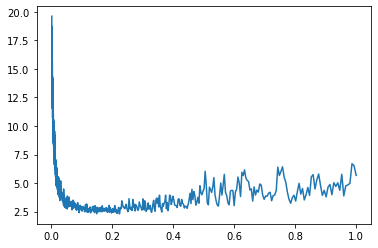

In [228]:
plt.plot(lri,lossi)  # discuss......

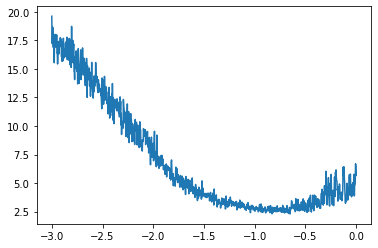

In [229]:
plt.plot(lriex,lossi)  # discuss......

In [230]:
# we can do already much better than bigram....almost...remember overfitting.... 

emb=C[X] # torch.Size([41, 3, 2])
h=torch.tanh(emb.view(-1,6) @ W1 + b1) #(41,100)
logits= h @ W2 + b2 #(41,27)
loss=F.cross_entropy(logits,Y)
loss

tensor(5.9779, grad_fn=<NllLossBackward0>)

In [231]:
# training split, dev/validation split (for hypermarameters !!), test split
# 80%, 10%, 10%
# be careful with the test eugene.....

def build_dataset(words):
    block_size =3 #context length: how many characters do we take to predict the next one ... change it !!
    X,Y = [],[]  # input & label

   
    for w in words:
        context=[0]*block_size
        for ch in w +'.':
            ix=stoi[ch]
            X.append(context)
            Y.append(ix)
      #  print(''.join(itos[i] for i in context), '--->', itos[ix])
            context=context[1:]+[ix]  # shift: crop and append
    X=torch.tensor(X)
    Y=torch.tensor(Y)
    print(X.shape,Y.shape)
    return X,Y



    

In [232]:
import random
random.seed(42)
random.shuffle(words)
n1=int(0.8*len(words))
n2=int(0.9*len(words))

Xtr,Ytr = build_dataset(words[:n1])
Xdev,Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])



torch.Size([58867, 3]) torch.Size([58867])
torch.Size([7404, 3]) torch.Size([7404])
torch.Size([7372, 3]) torch.Size([7372])


In [233]:
# and we do it again with the new datasets.......
Xtr.shape, Ytr.shape

# exactly as before....
g=torch.Generator().manual_seed(123456780)# for reproducibility
C=torch.randn((28,2), generator=g)
W1=torch.randn((6,100), generator=g)
b1=torch.randn(100, generator=g)
W2=torch.randn((100,28), generator=g)
b2=torch.randn(28, generator=g)
parameters=[C,W1,b1,W2,b2]

In [234]:
for p in parameters:
    p.requires_grad = True
    
    
lre=torch.linspace(-3,0,1000)
lrs= 10**lre


In [235]:
# now we train only on Xtr

lri=[]
lriex=[]
lossi=[]
    

for i in range(10000):
    
    # mini batch construct
    ix=torch.randint(0,Xtr.shape[0],(40,))
    # now we learn...forward bass -- = 73643
    emb=C[Xtr[ix]] # torch.Size([--, 3, 2])
    h=torch.tanh(emb.view(-1,6) @ W1 + b1) #(--,100)
    logits= h @ W2 + b2 #(--,27)
    loss=F.cross_entropy(logits,Ytr[ix])
   # print(i,loss.item())
    # backward pass 
    for p in parameters:
        p.grad=None
    loss.backward()
    #update
    #lr=lrs[i]
    lr= .1
    for p in parameters:
        p.data += -lr*p.grad
print(loss.item())

#track stats
#    lri.append(lr)
#    lriex.append(lre[i])
#    lossi.append(loss.item())

1.9719079732894897


In [236]:
# now we evaluate on Xdev
emb=C[Xdev]
h=torch.tanh(emb.view(-1,6) @ W1 + b1) #(--,100)
logits= h @ W2 + b2 #(--,27)
loss=F.cross_entropy(logits,Ydev)
loss

tensor(2.3274, grad_fn=<NllLossBackward0>)

In [237]:
# now we evaluate on Xtr..... we are NOT overfitting
emb=C[Xtr]
h=torch.tanh(emb.view(-1,6) @ W1 + b1) #(--,100)
logits= h @ W2 + b2 #(--,27)
loss=F.cross_entropy(logits,Ytr)
loss

tensor(2.3201, grad_fn=<NllLossBackward0>)

In [238]:
# now we cahnge the hyper parameters....
# before....
#g=torch.Generator().manual_seed(123456780)# for reproducibility
#C=torch.randn((28,2), generator=g)
#W1=torch.randn((6,100), generator=g)
#b1=torch.randn(100, generator=g)
#W2=torch.randn((100,28), generator=g)
#b2=torch.randn(28, generator=g)
#parameters=[C,W1,b1,W2,b2]

g=torch.Generator().manual_seed(123456780)# for reproducibility
C=torch.randn((28,2), generator=g)
W1=torch.randn((6,300), generator=g)
b1=torch.randn(300, generator=g)
W2=torch.randn((300,28), generator=g)
b2=torch.randn(28, generator=g)
parameters=[C,W1,b1,W2,b2]

In [239]:
sum(p.nelement() for p in parameters)# number of parameter in total... before 3584

10584

In [240]:
lri=[]
lriex=[]
lossi=[]
stepi=[]
for p in parameters:
    p.requires_grad = True

for i in range(10000):
    
    # mini batch construct
    ix=torch.randint(0,Xtr.shape[0],(40,))
    # now we learn...forward bass -- = 73643
    emb=C[Xtr[ix]] # torch.Size([--, 3, 2])
    h=torch.tanh(emb.view(-1,6) @ W1 + b1) #(--,100)
    logits= h @ W2 + b2 #(--,27)
    loss=F.cross_entropy(logits,Ytr[ix])
   # print(i,loss.item())
    # backward pass 
    for p in parameters:
        p.grad=None
    loss.backward()
    #update
    #lr=lrs[i]
    lr= .1
    for p in parameters:
        p.data += -lr*p.grad
    stepi.append(i)
    lossi.append(loss.item())

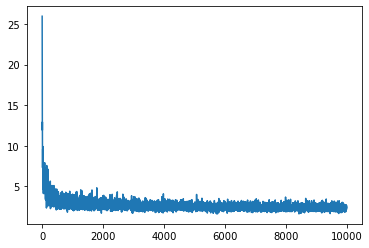

In [111]:
plt.plot(stepi,lossi)

In [112]:
# Exercise with different hypermarameters and learning rate.....describe and discuss results....

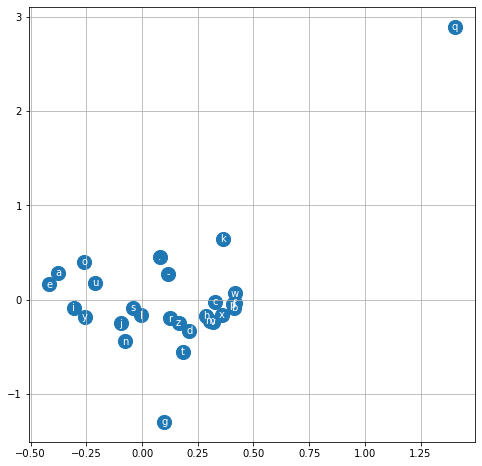

In [113]:
#visualizing the embedding.....

plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(),itos[i], ha="center",va="center", color="white")
    plt.grid('minor')

In [114]:
# we scale up the embedding dimension and see what happen


g=torch.Generator().manual_seed(123456780)# for reproducibility
C=torch.randn((28,10), generator=g)
W1=torch.randn((30,200), generator=g)
b1=torch.randn(200, generator=g)
W2=torch.randn((200,28), generator=g)
b2=torch.randn(28, generator=g)
parameters=[C,W1,b1,W2,b2]

In [115]:
sum(p.nelement() for p in parameters)# number of parameter in total

12108

In [116]:
lri=[]
lriex=[]
lossi=[]
stepi=[]

for p in parameters:
    p.requires_grad = True

In [117]:
# do lr =0.1 and then 0.01 and look at the performance....


for i in range(200000):
    
    # mini batch construct
    ix=torch.randint(0,Xtr.shape[0],(40,))
    # now we learn...forward bass -- = 73643
    emb=C[Xtr[ix]] # torch.Size([--, 3, 2])
    h=torch.tanh(emb.view(-1,30) @ W1 + b1) #(--,100)
    logits= h @ W2 + b2 #(--,27)
    loss=F.cross_entropy(logits,Ytr[ix])
   # print(i,loss.item())
    # backward pass 
    for p in parameters:
        p.grad=None
    loss.backward()
    #update
    #lr=lrs[i]
    lr= .1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr*p.grad
    stepi.append(i)
    lossi.append(loss.log10().item()) # note the log10 !!

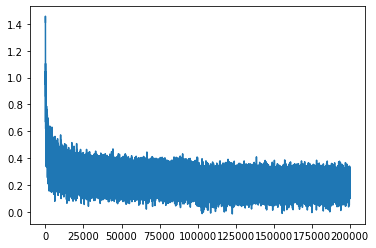

In [118]:
plt.plot(stepi,lossi)

In [119]:
emb=C[Xtr]
h=torch.tanh(emb.view(-1,30) @ W1 + b1) #(--,100)   30 not 6 !
logits= h @ W2 + b2 #(--,27)
loss=F.cross_entropy(logits,Ytr)
loss

tensor(1.6381, grad_fn=<NllLossBackward>)

In [120]:
emb=C[Xdev]
h=torch.tanh(emb.view(-1,30) @ W1 + b1) #(--,100)
logits= h @ W2 + b2 #(--,27)
loss=F.cross_entropy(logits,Ydev)
loss

tensor(1.8367, grad_fn=<NllLossBackward>)

In [ ]:
# several (hyper)parameters to paly with: number of layer, numbers of neurons fro layers, embedding dimensions..dimension of the batches, learning rate....
# now you can read the cited paper on language models......


In [123]:
# sampling from the model.....

g=torch.Generator().manual_seed(12345678+10)

for _ in range(30):
    out=[]
    context=[0]*block_size
    while True:
        emb=C[torch.tensor([context])]
        h=torch.tanh(emb.view(1,-1) @ W1 + b1) 
        logits= h @ W2 + b2
        probs=F.softmax(logits,dim=1)
        ix=torch.multinomial(probs,num_samples=1,generator=g).item()
        context=context[1:]+[ix]
        out.append(ix)
        if ix==0:
            break
        
    print(''.join(itos[i] for i in out))
        

alfredano.
modelfa.
adamello.
amo.
remilo.
lorettoriano.
ferratuh.
mariellevando.
zaffiermilio.
piererio.
waltobrasio.
amasinalda.
fiorea.
gabrina.
illa.
van.
obilio.
cedo.
alfredana.
age.
raingelo.
amario.
ave.
iotto.
ariana.
raulo.
palmieze.
mone.
edea.
armo.
